In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Scocial Media Data Mining/SourceCode/Thu_LogisticRegression/UIT-VSFC/Topic

/content/drive/.shortcut-targets-by-id/1CZcWZiWtxpQUuZayUBOYLquIpN5fLP1b/Scocial Media Data Mining/SourceCode/Thu_LogisticRegression/UIT-VSFC/Topic


In [ ]:
#Thư's path
path= "/content/drive/MyDrive/Scocial Media Data Mining/"

# 1. Import thư viện

In [ ]:
import torch
import pandas as pd
import numpy as np
import pickle

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 7.6MB/s 
     |████████████████████████████████| 747kB 35.8MB/s 


In [ ]:
#Model
from sklearn.linear_model import LogisticRegression

#Tách từ
from pyvi import ViTokenizer, ViPosTagger
import re

#Xử lý label
from sklearn.preprocessing import LabelEncoder

#Xử lý biến đổi doc về dạng if-idf
from sklearn.feature_extraction.text import TfidfVectorizer

#Matrix đánh giá
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Vẽ đò thị
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

#Tạo report
from sklearn.metrics import classification_report

# 2. Load data

In [ ]:
train = pd.read_csv(path + "Dataset/UIT-VSFC/VSFC_train.csv", index_col=False)
dev = pd.read_csv(path + "Dataset/UIT-VSFC/VSFC_dev.csv", index_col=False)
test = pd.read_csv(path + "Dataset/UIT-VSFC/VSFC_test.csv", index_col=False)

X_train = train['Sents']
y_train = train['Topic'].values

X_dev = dev['Sents']
y_dev = dev['Topic'].values

X_test = test['Sents']
y_test = test['Topic'].values

X_train.sample(10)

8560                cần cho nhiều bài tập về nhà hơn nữa .
8417               thầy chia sẻ nhiều điều trong thực tế .
2547                       giảng dạy còn nhiều thiết sót .
4145                           cần làm nhiều bài tập hơn .
1249     kiến thức của môn này có lẽ hiếm khi nào tụi e...
6641       thầy dạy rất chi tiết , dễ hiểu và nhiệt tình .
10850                     tâm huyết nhiệt tình giảng dạy .
3400                       lý do doubledot " thầy quên " .
4334          cô nhiệt tình giảng bài , hỗ trợ sinh viên .
5508                           dạy theo đề cương môn học .
Name: Sents, dtype: object

# 3. Tiền xử lý data

In [ ]:
#Stop word
with open(path + "SourceCode/Thu_LogisticRegression/vietnamese-stopwords.txt") as f:
  stopwords = [x.rstrip() for x in f]
print(stopwords)

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [ ]:
#Xóa stop word
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

#Tiền xử lý
def preProcess(X_data):
  X_data = X_data.lower() #Chuyển về chữ viết thường
  X_data = ViTokenizer.tokenize(X_data) #Tách từ
  X_data = re.sub(r'\W+', ' ', X_data) #Bỏ ký tự đặt biệt
  X_data = re.sub(r'\w*\d\w*', '', X_data).strip()
  X_data = remove_stopwords(X_data) #Xóa stop word
  return X_data

In [ ]:
X_train_pro = X_train.apply(preProcess)
X_test_pro = X_test.apply(preProcess)
X_dev_pro = X_dev.apply(preProcess)

In [ ]:
X_train_pro.sample(20)

1487                                    thái_độ nhiệt_tình
306                             thầy dạy tận_tụy tâm_huyết
4190     giảng_viên thân_thiện hoà_đồng khả_năng truyền...
3368                        học_sinh thuyết_trình chủ_động
8342                     hướng_dẫn tận_tình ví_dụ minh_họa
9284     dạy tận_tâm cung_cấp kiến_thức môn_học học thự...
10428    chủ_yếu đọc slide đôi_khi nhàm_chán mặc_dù thầ...
6141                      giảng_viên dạy hướng_dẫn rõ_ràng
5741             thầy thân_thiện dạy phương_pháp giảng_dạy
10891                     giáo_viên dạy sinh_viên tiếp_thu
5713     tuy_nhiên bài_tập thực_hành hơi đơn_giản thực_...
9228            kiểu giáo_viên chạy phân_phối chương_trình
5151     giảng_viên nhiệt_tình quá_trình giảng_dạy hướn...
8058     thiết_kế trình_bày giảng mạch_lạc ngắn_gọn chi...
10095                     giảng_viên cơ_hội sinh_viên cộng
1026                              slide giảng_dạy hiệu_quả
3566                              học lớp thực_sự hiệu_q

# 4. Xây dựng mô hình

In [ ]:
#Biến đổi nhãn về dạng số
le = LabelEncoder()
le.fit(y_train)
#Save le
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
y_train_encoding = le.transform(y_train)
y_dev_encoding = le.transform(y_dev)
y_test_encoding = le.transform(y_test)

In [ ]:
#Biến đỗi các doc về dạng if-idf
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train_pro)
print(tfidf_vect.vocabulary_) 
#Save tfidf_vect
with open('tfidf_vect.pkl', 'wb') as f:
    pickle.dump(tfidf_vect, f)

{'slide': 1952, 'giáo_trình': 707, 'đầy_đủ': 2962, 'nhiệt_tình': 1561, 'giảng_dạy': 733, 'gần_gũi': 781, 'sinh_viên': 1944, 'đi': 2867, 'học': 938, 'full': 661, 'chuyên_cần': 220, 'áp_dụng': 2824, 'công_nghệ': 421, 'thông_tin': 2160, 'thiết_bị': 2088, 'hỗ_trợ': 977, 'thầy': 2185, 'giảng': 732, 'bài_tập': 65, 'ví_dụ': 2661, 'lớp': 1308, 'giảng_viên': 737, 'đảm_bảo': 2949, 'thời_gian': 2219, 'lên_lớp': 1231, 'tích_cực': 2462, 'trả_lời': 2381, 'câu': 399, 'thường_xuyên': 2175, 'nợ': 1690, 'môn': 1386, 'học_kỳ': 942, 'kế_tiếp': 1142, 'thời_lượng': 2222, 'tiếp_thu': 2280, 'hiệu_quả': 838, 'nội_dung': 1686, 'môn_học': 1388, 'trọng_tâm': 2395, 'hầu_như': 924, 'chung_chung': 218, 'khái_quát': 1046, 'nắm': 1669, 'trình_bày': 2356, 'bảng': 107, 'thay_vì': 2072, 'tận_tình': 2528, 'dạy': 590, 'áp_lực': 2825, 'nước_ngoài': 1665, 'giữa_chừng': 752, 'thay': 2070, 'nâng': 1634, 'độ': 3033, 'có_thể': 409, 'thăm': 2167, 'quan': 1823, 'công_ty': 427, 'quy_mô': 1840, 'làm_việc': 1222, 'giúp': 713, 'vê': 2

In [ ]:
X_train_tfidf =  tfidf_vect.transform(X_train_pro)         
X_test_tfidf =  tfidf_vect.transform(X_test_pro)
X_dev_tfidf =  tfidf_vect.transform(X_dev_pro)

In [ ]:
#Mô hình LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train_encoding)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Save model
with open('LogisticRegression.pkl', 'wb') as f:
    pickle.dump(lr, f)

# 5. Đánh giá mô hình

In [ ]:
#Load model
with open('LogisticRegression.pkl', 'rb') as f:
    lr = pickle.load(f)

In [ ]:
# Danh gia mo hinh
y_true = y_test_encoding
y_pred = lr.predict(X_test_tfidf)

cf = confusion_matrix(y_true, y_pred, labels= pd.Series(y_true).unique())

print("accuracy: " + str(accuracy_score(y_true, y_pred)))
print("F1 - macro: " + str(f1_score(y_true, y_pred, average='macro'))+ '\n')
target_names = pd.Series(y_test).astype(str).unique()
print('Classification report in Training set')
print(classification_report(y_true, y_pred, labels=pd.Series(y_true).unique(), target_names=target_names))

accuracy: 0.8445988629185092
F1 - macro: 0.6757957107776238

Classification report in Training set
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2290
           1       0.68      0.66      0.67       572
           3       0.71      0.15      0.25       159
           2       0.94      0.83      0.88       145

    accuracy                           0.84      3166
   macro avg       0.80      0.64      0.68      3166
weighted avg       0.84      0.84      0.83      3166



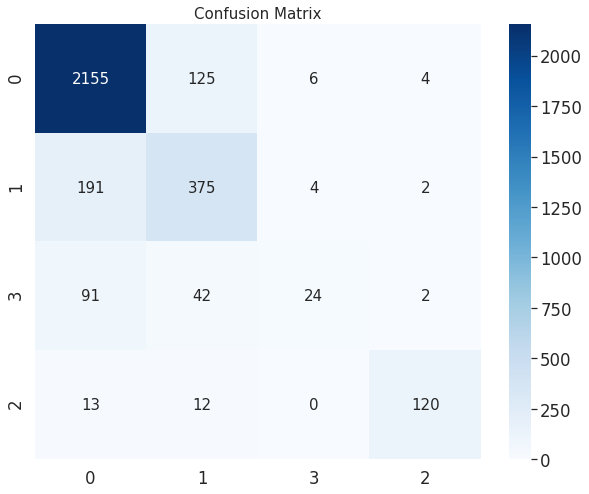

In [ ]:
# Ve ma tran nham lan
plt.figure(figsize=(10,8))
df_cm = pd.DataFrame(cf, index = pd.Series(y_test).unique(),
                  columns = pd.Series(y_test).unique())

ax = plt.subplot()
sn.set(font_scale=1.5) # Adjust to fit

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'15'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

sn.heatmap(df_cm, annot=True, ax=ax, cmap="Blues", fmt="g", annot_kws={"size": 15});  
# sn.heatmap(df_cm, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 10})

# Demo

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 5.4MB/s 
     |████████████████████████████████| 747kB 34.9MB/s 


In [ ]:
import pickle
import re
from pyvi import ViTokenizer, ViPosTagger

In [ ]:
path= "/content/drive/MyDrive/Scocial Media Data Mining/"

In [ ]:
#Load Stop word
with open(path + "SourceCode/Thu_LogisticRegression/vietnamese-stopwords.txt") as f:
  stopwords = [x.rstrip() for x in f]

#Xóa stop word
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

#Tiền xử lý
def preProcess(X_data):
  X_data = X_data.lower()
  X_data = ViTokenizer.tokenize(X_data) #Tách từ
  X_data = re.sub(r'\W+', ' ', X_data) #Bỏ ký tự đặt biệt
  X_data = re.sub(r'\w*\d\w*', '', X_data).strip() #Bỏ số và từ có số
  X_data = remove_stopwords(X_data) #Xóa stop word
  return X_data

In [ ]:
#Load model
with open('LogisticRegression.pkl', 'rb') as f:
    lr = pickle.load(f)

In [ ]:
with open('le.pkl', 'rb') as f:
    le = pickle.load(f)
with open('tfidf_vect.pkl', 'rb') as f:
    tfidf_vect = pickle.load(f)

In [ ]:
Sentence = input("Enter sentence: ")
Sentence = preProcess(Sentence)
Sentence_tfidf = tfidf_vect.transform([Sentence])
result = lr.predict(Sentence_tfidf)
print('Topic: ', le.inverse_transform(result))

Enter sentence: tính điểm thi đua các nhóm .
Topic:  [1]
